In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("DNN_data.csv", parse_dates = ["time"], index_col = "time")
symbol = df.columns[0]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55785 entries, 2017-01-02 23:20:00 to 2019-12-31 00:20:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  55785 non-null  float64
dtypes: float64(1)
memory usage: 871.6 KB


In [9]:
window = 50
long_sma = 150
momentum_window = 3

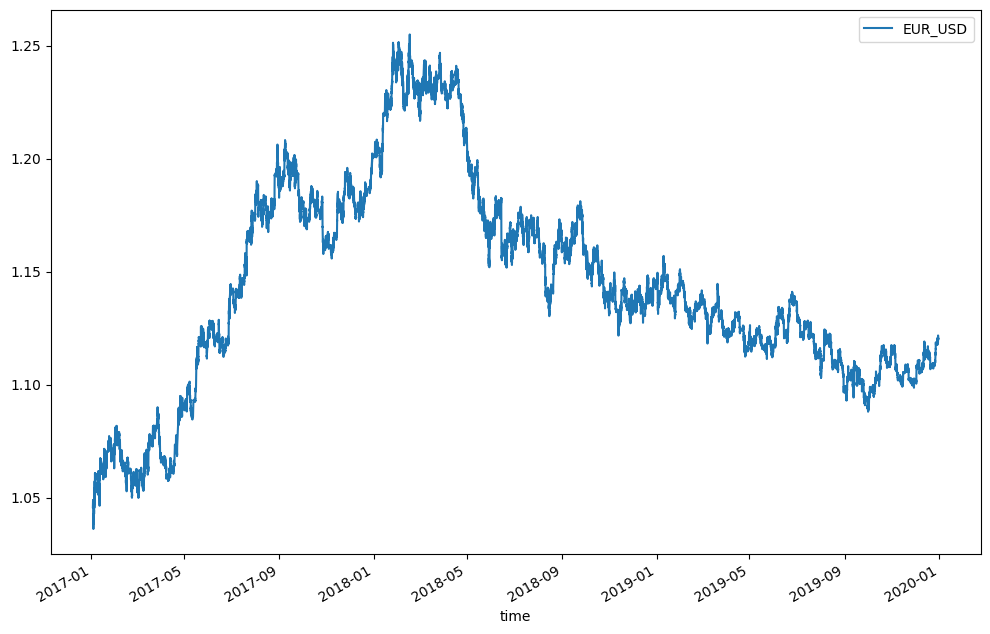

In [10]:
df.plot(figsize=(12, 8))
plt.show()

In [11]:
df["returns"] = np.log(df[symbol] / df[symbol].shift())

In [12]:
df

,EUR_USD,returns
time,,
2017-01-02 23:20:00,1.04574,NaN
2017-01-02 23:40:00,1.04608,0.000325
2017-01-03 00:00:00,1.04575,-0.000316
2017-01-03 00:20:00,1.04672,0.000927
2017-01-03 00:40:00,1.04696,0.000229
...,...,...
2019-12-30 23:00:00,1.12012,0.000080
2019-12-30 23:20:00,1.12030,0.000161
2019-12-30 23:40:00,1.12018,-0.000107


In [13]:
data = df.copy()
data['dir'] = np.where(data['returns'] > 0, 1,0)
data['sma'] = data[symbol].rolling(window).mean() - data[symbol].rolling(long_sma).mean()
data['boll'] = (data[symbol] - data[symbol].rolling(window).mean()) / data[symbol].rolling(window).std()
data['min'] = data[symbol].rolling(window).min() / data[symbol] - 1
data['max'] = data[symbol].rolling(window).max() / data[symbol] - 1
data['mom'] = data['returns'].rolling(momentum_window).mean()
data['vol'] = data['returns'].rolling(window).std()
data.dropna(inplace=True)
data

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol
time,,,,,,,,,
2017-01-05 01:00:00,1.05406,0.001728,1,0.002748,2.777610,-0.010948,0.000000,1.384831e-03,0.000803
2017-01-05 01:20:00,1.05226,-0.001709,0,0.002899,2.000277,-0.009047,0.001711,-1.013537e-04,0.000841
2017-01-05 01:40:00,1.05138,-0.000837,0,0.003024,1.604398,-0.008218,0.002549,-2.725461e-04,0.000848
2017-01-05 02:00:00,1.05196,0.000552,1,0.003139,1.718860,-0.008765,0.001996,-6.647612e-04,0.000847
2017-01-05 02:20:00,1.05230,0.000323,1,0.003266,1.742715,-0.009085,0.001673,1.267090e-05,0.000847
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.000080,1,0.003163,0.116062,-0.001357,0.001446,5.952275e-05,0.000407
2019-12-30 23:20:00,1.12030,0.000161,1,0.003116,0.335572,-0.001517,0.001285,-2.975261e-05,0.000396
2019-12-30 23:40:00,1.12018,-0.000107,0,0.003058,0.155421,-0.001410,0.001393,4.463867e-05,0.000395


In [14]:
data.describe()

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol
count,55636.000000,55636.000000,55636.000000,55636.000000,55636.000000,55636.000000,55636.000000,5.563600e+04,55636.000000
mean,1.143866,0.000001,0.492181,0.000068,0.001570,-0.002251,0.002177,1.137574e-06,0.000462
std,0.045713,0.000495,0.499943,0.002585,1.437175,0.002205,0.002097,2.823596e-04,0.000182
min,1.046380,-0.008392,0.000000,-0.012869,-6.264949,-0.019673,0.000000,-3.643085e-03,0.000082
25%,1.114200,-0.000214,0.000000,-0.001613,-1.044366,-0.003194,0.000642,-1.225118e-04,0.000338
50%,1.137630,0.000000,0.000000,-0.000010,0.016489,-0.001570,0.001584,2.904194e-17,0.000435
75%,1.175020,0.000216,1.000000,0.001662,1.062898,-0.000665,0.003129,1.226404e-04,0.000550
max,1.254940,0.015430,1.000000,0.009903,6.321360,0.000000,0.023081,5.771696e-03,0.002356


In [15]:
lags = 5

In [16]:
cols = []
features = ['dir', 'sma', 'boll', 'min', 'max', 'mom', 'vol']

In [17]:
for f in features:
    for lag in range(1, lags + 1):
        col = "{}_lag_{}".format(f, lag)
        data[col] = data[f].shift(lag)
        cols.append(col)
data.dropna(inplace=True)
data

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.05124,-0.001008,0,0.003386,1.322766,-0.008086,0.002683,-4.438906e-05,0.000860,1.0,...,1.267090e-05,-6.647612e-04,-0.000273,-0.000101,0.001385,0.000847,0.000847,0.000848,0.000841,0.000803
2017-01-05 03:00:00,1.05150,0.000247,1,0.003512,1.355157,-0.008331,0.002435,-1.457915e-04,0.000859,0.0,...,-4.438906e-05,1.267090e-05,-0.000665,-0.000273,-0.000101,0.000860,0.000847,0.000847,0.000848,0.000841
2017-01-05 03:20:00,1.05230,0.000761,1,0.003652,1.557089,-0.009085,0.001673,-1.362481e-17,0.000863,1.0,...,-1.457915e-04,-4.438906e-05,0.000013,-0.000665,-0.000273,0.000859,0.000860,0.000847,0.000847,0.000848
2017-01-05 03:40:00,1.05192,-0.000361,0,0.003799,1.375429,-0.008727,0.002034,2.155487e-04,0.000862,1.0,...,-1.362481e-17,-1.457915e-04,-0.000044,0.000013,-0.000665,0.000863,0.000859,0.000860,0.000847,0.000847
2017-01-05 04:00:00,1.05204,0.000114,1,0.003922,1.357637,-0.008840,0.001920,1.711401e-04,0.000852,0.0,...,2.155487e-04,-1.362481e-17,-0.000146,-0.000044,0.000013,0.000862,0.000863,0.000859,0.000860,0.000847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.000080,1,0.003163,0.116062,-0.001357,0.001446,5.952275e-05,0.000407,0.0,...,-6.844352e-05,6.545924e-05,0.000021,0.000104,0.000098,0.000408,0.000406,0.000402,0.000401,0.000402
2019-12-30 23:20:00,1.12030,0.000161,1,0.003116,0.335572,-0.001517,0.001285,-2.975261e-05,0.000396,1.0,...,5.952275e-05,-6.844352e-05,0.000065,0.000021,0.000104,0.000407,0.000408,0.000406,0.000402,0.000401
2019-12-30 23:40:00,1.12018,-0.000107,0,0.003058,0.155421,-0.001410,0.001393,4.463867e-05,0.000395,1.0,...,-2.975261e-05,5.952275e-05,-0.000068,0.000065,0.000021,0.000396,0.000407,0.000408,0.000406,0.000402


In [18]:
len(cols)

35

In [19]:
len(data)

55631

In [20]:
split = int(len(data)* 0.3)
train = data.iloc[:split].copy()
train

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.05124,-0.001008,0,0.003386,1.322766,-0.008086,0.002683,-4.438906e-05,0.000860,1.0,...,1.267090e-05,-6.647612e-04,-0.000273,-0.000101,0.001385,0.000847,0.000847,0.000848,0.000841,0.000803
2017-01-05 03:00:00,1.05150,0.000247,1,0.003512,1.355157,-0.008331,0.002435,-1.457915e-04,0.000859,0.0,...,-4.438906e-05,1.267090e-05,-0.000665,-0.000273,-0.000101,0.000860,0.000847,0.000847,0.000848,0.000841
2017-01-05 03:20:00,1.05230,0.000761,1,0.003652,1.557089,-0.009085,0.001673,-1.362481e-17,0.000863,1.0,...,-1.457915e-04,-4.438906e-05,0.000013,-0.000665,-0.000273,0.000859,0.000860,0.000847,0.000847,0.000848
2017-01-05 03:40:00,1.05192,-0.000361,0,0.003799,1.375429,-0.008727,0.002034,2.155487e-04,0.000862,1.0,...,-1.362481e-17,-1.457915e-04,-0.000044,0.000013,-0.000665,0.000863,0.000859,0.000860,0.000847,0.000847
2017-01-05 04:00:00,1.05204,0.000114,1,0.003922,1.357637,-0.008840,0.001920,1.711401e-04,0.000852,0.0,...,2.155487e-04,-1.362481e-17,-0.000146,-0.000044,0.000013,0.000862,0.000863,0.000859,0.000860,0.000847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-24 20:00:00,1.19266,0.000109,1,0.003099,1.243894,-0.007295,0.001098,3.354016e-05,0.000413,1.0,...,-8.385428e-06,-5.590309e-05,-0.000061,-0.000145,-0.000282,0.000415,0.000415,0.000414,0.000414,0.000413
2017-11-24 20:20:00,1.19267,0.000008,1,0.003160,1.195876,-0.007303,0.001090,6.428774e-05,0.000412,1.0,...,3.354016e-05,-8.385428e-06,-0.000056,-0.000061,-0.000145,0.000413,0.000415,0.000415,0.000414,0.000414
2017-11-24 20:40:00,1.19268,0.000008,1,0.003228,1.150992,-0.007311,0.001082,4.192503e-05,0.000407,1.0,...,6.428774e-05,3.354016e-05,-0.000008,-0.000056,-0.000061,0.000412,0.000413,0.000415,0.000415,0.000414


In [21]:
test = data.iloc[split:].copy()
test

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-11-24 21:40:00,1.19350,-0.000369,0,0.003468,1.219148,-0.007993,0.000394,2.290970e-04,0.000415,1.0,...,0.000355,0.000120,0.000042,0.000064,0.000034,0.000414,0.000407,0.000407,0.000412,0.000413
2017-11-24 22:00:00,1.19325,-0.000209,0,0.003556,1.104014,-0.007785,0.000603,4.469886e-05,0.000418,0.0,...,0.000229,0.000355,0.000120,0.000042,0.000064,0.000415,0.000414,0.000407,0.000407,0.000412
2017-11-26 22:20:00,1.19320,-0.000042,0,0.003640,1.047758,-0.007744,0.000645,-2.066629e-04,0.000418,0.0,...,0.000045,0.000229,0.000355,0.000120,0.000042,0.000418,0.000415,0.000414,0.000407,0.000407
2017-11-26 22:40:00,1.19307,-0.000109,0,0.003722,0.972170,-0.007636,0.000754,-1.201166e-04,0.000419,0.0,...,-0.000207,0.000045,0.000229,0.000355,0.000120,0.000418,0.000418,0.000415,0.000414,0.000407
2017-11-26 23:00:00,1.19354,0.000394,1,0.003810,1.062472,-0.008027,0.000360,8.100140e-05,0.000420,0.0,...,-0.000120,-0.000207,0.000045,0.000229,0.000355,0.000419,0.000418,0.000418,0.000415,0.000414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.000080,1,0.003163,0.116062,-0.001357,0.001446,5.952275e-05,0.000407,0.0,...,-0.000068,0.000065,0.000021,0.000104,0.000098,0.000408,0.000406,0.000402,0.000401,0.000402
2019-12-30 23:20:00,1.12030,0.000161,1,0.003116,0.335572,-0.001517,0.001285,-2.975261e-05,0.000396,1.0,...,0.000060,-0.000068,0.000065,0.000021,0.000104,0.000407,0.000408,0.000406,0.000402,0.000401
2019-12-30 23:40:00,1.12018,-0.000107,0,0.003058,0.155421,-0.001410,0.001393,4.463867e-05,0.000395,1.0,...,-0.000030,0.000060,-0.000068,0.000065,0.000021,0.000396,0.000407,0.000408,0.000406,0.000402


In [22]:
mu, std = train.mean(), train.std()

In [23]:
mu

EUR_USD       1.124892
returns       0.000008
dir           0.496435
sma           0.000428
boll          0.054613
min          -0.002632
max           0.002242
mom           0.000008
vol           0.000507
dir_lag_1     0.496435
dir_lag_2     0.496435
dir_lag_3     0.496375
dir_lag_4     0.496315
dir_lag_5     0.496315
sma_lag_1     0.000428
sma_lag_2     0.000428
sma_lag_3     0.000428
sma_lag_4     0.000427
sma_lag_5     0.000427
boll_lag_1    0.054633
boll_lag_2    0.054664
boll_lag_3    0.054691
boll_lag_4    0.054739
boll_lag_5    0.054831
min_lag_1    -0.002632
min_lag_2    -0.002632
min_lag_3    -0.002632
min_lag_4    -0.002633
min_lag_5    -0.002633
max_lag_1     0.002242
max_lag_2     0.002242
max_lag_3     0.002243
max_lag_4     0.002243
max_lag_5     0.002243
mom_lag_1     0.000008
mom_lag_2     0.000007
mom_lag_3     0.000007
mom_lag_4     0.000007
mom_lag_5     0.000008
vol_lag_1     0.000507
vol_lag_2     0.000507
vol_lag_3     0.000507
vol_lag_4     0.000507
vol_lag_5  

In [24]:
std

EUR_USD       0.049849
returns       0.000544
dir           0.500002
sma           0.002789
boll          1.439775
min           0.002599
max           0.002097
mom           0.000310
vol           0.000200
dir_lag_1     0.500002
dir_lag_2     0.500002
dir_lag_3     0.500002
dir_lag_4     0.500001
dir_lag_5     0.500001
sma_lag_1     0.002789
sma_lag_2     0.002789
sma_lag_3     0.002789
sma_lag_4     0.002789
sma_lag_5     0.002789
boll_lag_1    1.439797
boll_lag_2    1.439827
boll_lag_3    1.439852
boll_lag_4    1.439903
boll_lag_5    1.440028
min_lag_1     0.002599
min_lag_2     0.002599
min_lag_3     0.002599
min_lag_4     0.002599
min_lag_5     0.002600
max_lag_1     0.002097
max_lag_2     0.002097
max_lag_3     0.002097
max_lag_4     0.002097
max_lag_5     0.002097
mom_lag_1     0.000310
mom_lag_2     0.000310
mom_lag_3     0.000310
mom_lag_4     0.000310
mom_lag_5     0.000310
vol_lag_1     0.000200
vol_lag_2     0.000200
vol_lag_3     0.000200
vol_lag_4     0.000200
vol_lag_5  

In [25]:
train_standardized = (train-mu) / std

In [26]:
train_standardized

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,-1.477520,-1.866357,-0.992865,1.060553,0.880800,-2.098622,0.209953,-0.167541,1.766221,1.007126,...,0.016567,-2.168046,-0.903045,-0.350919,4.439110,1.697317,1.696388,1.703940,1.668468,1.477845
2017-01-05 03:00:00,-1.472304,0.440639,1.007126,1.105823,0.903297,-2.193007,0.091721,-0.494603,1.757521,-0.992865,...,-0.167481,0.016716,-2.167934,-0.903010,-0.350972,1.765950,1.697052,1.696121,1.703681,1.668253
2017-01-05 03:20:00,-1.456256,1.383994,1.007126,1.155968,1.043549,-2.483131,-0.271703,-0.024369,1.778937,1.007126,...,-0.494555,-0.167306,0.016776,-2.167896,-0.902738,1.757251,1.765679,1.696785,1.695862,1.703464
2017-01-05 03:40:00,-1.463879,-0.677779,-0.992865,1.208766,0.917377,-2.345377,-0.099146,0.670859,1.775613,1.007126,...,-0.024304,-0.494336,-0.167241,0.016808,-2.166877,1.778665,1.756981,1.765407,1.696526,1.695646
2017-01-05 04:00:00,-1.461472,0.195761,1.007126,1.252888,0.905019,-2.388889,-0.153651,0.527624,1.722398,-0.992865,...,0.670950,-0.024149,-0.494263,-0.167209,0.016537,1.775342,1.778394,1.756709,1.765143,1.696310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-24 20:00:00,1.359466,0.186452,1.007126,0.957705,0.826019,-1.794196,-0.545499,0.083811,-0.472544,1.007126,...,-0.051351,-0.204440,-0.222384,-0.492689,-0.933749,-0.463523,-0.461655,-0.466881,-0.469420,-0.472963
2017-11-24 20:20:00,1.359667,0.001503,1.007126,0.979790,0.792668,-1.797399,-0.549501,0.182984,-0.475027,1.007126,...,0.083880,-0.051192,-0.204374,-0.222352,-0.492659,-0.472636,-0.463618,-0.461750,-0.466974,-0.469509
2017-11-24 20:40:00,1.359868,0.001503,1.007126,1.004146,0.761493,-1.800602,-0.553504,0.110856,-0.502223,1.007126,...,0.183057,0.084021,-0.051130,-0.204341,-0.222481,-0.475119,-0.472730,-0.463713,-0.461843,-0.467063


In [27]:
train_standardized.describe()

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,...,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04,1.668900e+04
mean,1.682584e-15,-5.321939e-18,8.429952e-17,-2.128776e-17,-3.406041e-18,4.002098e-17,-6.130874e-17,-1.277265e-18,-2.827014e-16,8.642829e-17,...,7.663592e-18,-1.234690e-17,-4.257551e-18,5.960572e-18,3.406041e-18,2.622652e-16,4.359733e-16,4.087249e-17,-3.610403e-16,-1.873323e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.575015e+00,-1.543850e+01,-9.928650e-01,-3.788222e+00,-4.389269e+00,-6.557869e+00,-1.069294e+00,-1.177472e+01,-1.776386e+00,-9.928650e-01,...,-1.177509e+01,-1.177333e+01,-1.177299e+01,-1.177292e+01,-1.176623e+01,-1.776374e+00,-1.776365e+00,-1.776357e+00,-1.776349e+00,-1.776361e+00
25%,-1.046014e+00,-4.458280e-01,-9.928650e-01,-6.778977e-01,-7.516934e-01,-4.429481e-01,-7.518524e-01,-4.612796e-01,-6.304506e-01,-9.928650e-01,...,-4.612308e-01,-4.610308e-01,-4.609663e-01,-4.609331e-01,-4.609219e-01,-6.305299e-01,-6.306119e-01,-6.306940e-01,-6.307741e-01,-6.308540e-01
50%,-5.762270e-02,-1.390808e-02,-9.928650e-01,-4.572725e-02,3.196566e-02,3.112298e-01,-2.753571e-01,-1.512475e-02,-2.055092e-01,-9.928650e-01,...,-1.505921e-02,-1.491578e-02,-1.486282e-02,-1.486861e-02,-1.512080e-02,-2.056205e-01,-2.057108e-01,-2.057230e-01,-2.058105e-01,-2.057860e-01
75%,1.013218e+00,4.411443e-01,1.007126e+00,6.175868e-01,7.415974e-01,7.247818e-01,4.973353e-01,4.417874e-01,3.795033e-01,1.007126e+00,...,4.414241e-01,4.415153e-01,4.415655e-01,4.415963e-01,4.415203e-01,3.794915e-01,3.793497e-01,3.792180e-01,3.791320e-01,3.791341e-01
max,1.670809e+00,2.834778e+01,1.007126e+00,3.195816e+00,4.352587e+00,1.012976e+00,6.838293e+00,1.859157e+01,9.250276e+00,1.007126e+00,...,1.859234e+01,1.858994e+01,1.858956e+01,1.858954e+01,1.857830e+01,9.249408e+00,9.248548e+00,9.247681e+00,9.246844e+00,9.246184e+00


In [28]:
from DNNModel import *

In [29]:
set_seeds(100)

model = create_model(hl=3, hu=50, dropout= True, input_dim=len(cols))
model.fit(x=train_standardized[cols], y=train['dir'], epochs=50, verbose=True,
          validation_split=0.2, shuffle=False, class_weight=cw(train))

C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\keras\src\trainers\data_adapters\data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


Epoch 1/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4968 - loss: 0.7132 - val_accuracy: 0.5093 - val_loss: 0.6934
Epoch 2/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5070 - loss: 0.7044 - val_accuracy: 0.5024 - val_loss: 0.6934
Epoch 3/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4941 - loss: 0.7011 - val_accuracy: 0.5057 - val_loss: 0.6932
Epoch 4/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5020 - loss: 0.6980 - val_accuracy: 0.5030 - val_loss: 0.6933
Epoch 5/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5076 - loss: 0.6968 - val_accuracy: 0.5024 - val_loss: 0.6933
Epoch 6/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4997 - loss: 0.6961 - val_accuracy: 0.5003 - val_loss: 0.6933
Epoch 7/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5054 - loss: 0.6965 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 8/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5089 - loss: 0.6951 - val_accuracy: 0.

In [30]:
model.evaluate(train_standardized[cols], train['dir'])

522/522 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.5431 - loss: 0.6897


[0.6905357241630554, 0.5348433256149292]

In [31]:
predict = model.predict(train_standardized[cols])
predict

522/522 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step


array([[0.4899044 ],
       [0.4851367 ],
       [0.48515376],
       ...,
       [0.4929709 ],
       [0.48289037],
       [0.4797971 ]], dtype=float32)

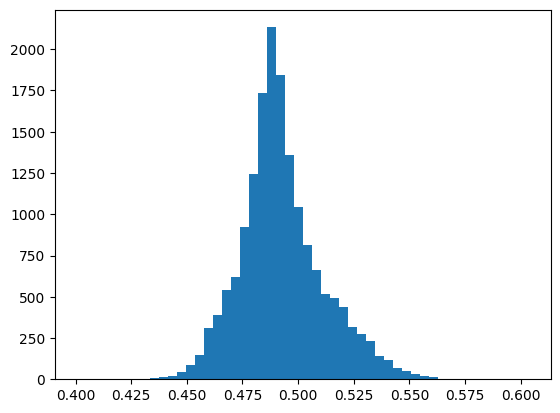

In [32]:
plt.hist(predict, bins=50)
plt.show()

In [33]:
test

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-11-24 21:40:00,1.19350,-0.000369,0,0.003468,1.219148,-0.007993,0.000394,2.290970e-04,0.000415,1.0,...,0.000355,0.000120,0.000042,0.000064,0.000034,0.000414,0.000407,0.000407,0.000412,0.000413
2017-11-24 22:00:00,1.19325,-0.000209,0,0.003556,1.104014,-0.007785,0.000603,4.469886e-05,0.000418,0.0,...,0.000229,0.000355,0.000120,0.000042,0.000064,0.000415,0.000414,0.000407,0.000407,0.000412
2017-11-26 22:20:00,1.19320,-0.000042,0,0.003640,1.047758,-0.007744,0.000645,-2.066629e-04,0.000418,0.0,...,0.000045,0.000229,0.000355,0.000120,0.000042,0.000418,0.000415,0.000414,0.000407,0.000407
2017-11-26 22:40:00,1.19307,-0.000109,0,0.003722,0.972170,-0.007636,0.000754,-1.201166e-04,0.000419,0.0,...,-0.000207,0.000045,0.000229,0.000355,0.000120,0.000418,0.000418,0.000415,0.000414,0.000407
2017-11-26 23:00:00,1.19354,0.000394,1,0.003810,1.062472,-0.008027,0.000360,8.100140e-05,0.000420,0.0,...,-0.000120,-0.000207,0.000045,0.000229,0.000355,0.000419,0.000418,0.000418,0.000415,0.000414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.000080,1,0.003163,0.116062,-0.001357,0.001446,5.952275e-05,0.000407,0.0,...,-0.000068,0.000065,0.000021,0.000104,0.000098,0.000408,0.000406,0.000402,0.000401,0.000402
2019-12-30 23:20:00,1.12030,0.000161,1,0.003116,0.335572,-0.001517,0.001285,-2.975261e-05,0.000396,1.0,...,0.000060,-0.000068,0.000065,0.000021,0.000104,0.000407,0.000408,0.000406,0.000402,0.000401
2019-12-30 23:40:00,1.12018,-0.000107,0,0.003058,0.155421,-0.001410,0.001393,4.463867e-05,0.000395,1.0,...,-0.000030,0.000060,-0.000068,0.000065,0.000021,0.000396,0.000407,0.000408,0.000406,0.000402


In [34]:
test_standardized = (test-mu) / std
test_standardized

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-11-24 21:40:00,1.376317,-0.691411,-0.992865,1.089976,0.808831,-2.063066,-0.881500,0.714557,-0.460111,1.007126,...,1.119968,0.363368,0.111120,0.183271,0.083801,-0.464958,-0.500855,-0.502496,-0.475399,-0.473006
2017-11-24 22:00:00,1.371302,-0.398964,-0.992865,1.121765,0.728865,-1.983085,-0.781549,0.119802,-0.448317,-0.992865,...,0.714650,1.119966,0.363420,0.111152,0.182902,-0.460204,-0.465053,-0.500947,-0.502586,-0.475488
2017-11-26 22:20:00,1.370299,-0.090929,-0.992865,1.151881,0.689792,-1.967085,-0.761554,-0.690936,-0.448703,-0.992865,...,0.119873,0.714704,1.120000,0.363451,0.110826,-0.448411,-0.460300,-0.465148,-0.501037,-0.502674
2017-11-26 22:40:00,1.367691,-0.214178,-0.992865,1.181040,0.637292,-1.925477,-0.709558,-0.411791,-0.443430,-0.992865,...,-0.690896,0.120008,0.714748,1.120029,0.362976,-0.448797,-0.448507,-0.460395,-0.465241,-0.501125
2017-11-26 23:00:00,1.377120,0.710040,1.007126,1.212853,0.700012,-2.075860,-0.897488,0.236892,-0.436048,-0.992865,...,-0.411740,-0.690650,0.120066,0.714778,1.119106,-0.443524,-0.448893,-0.448604,-0.460488,-0.465331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,-0.095738,0.133784,1.007126,0.980674,0.042680,0.490766,-0.379598,0.167615,-0.500448,-0.992865,...,-0.245069,0.186962,0.043107,0.311855,0.292246,-0.494708,-0.506245,-0.524932,-0.531570,-0.526876
2019-12-30 23:20:00,-0.092127,0.281440,1.007126,0.963895,0.195141,0.429019,-0.456330,-0.120332,-0.556318,1.007126,...,0.167687,-0.244883,0.187018,0.043139,0.311410,-0.500538,-0.494801,-0.506337,-0.525020,-0.531655
2019-12-30 23:40:00,-0.094534,-0.210802,-0.992865,0.943053,0.070017,0.470181,-0.405178,0.119608,-0.563294,1.007126,...,-0.120271,0.167816,-0.244817,0.187050,0.042852,-0.556403,-0.500630,-0.494894,-0.506427,-0.525106


In [35]:
test_standardized.describe()

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,...,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000,38942.000000
mean,0.543969,-0.016913,-0.012180,-0.184151,-0.052805,0.209895,-0.044757,-0.029600,-0.326891,-0.012180,...,-0.029506,-0.029340,-0.029279,-0.029239,-0.029485,-0.326991,-0.327094,-0.327199,-0.327300,-0.327397
std,0.826861,0.869117,0.999822,0.887934,0.996951,0.765278,0.999591,0.869203,0.847141,0.999822,...,0.869255,0.869139,0.869118,0.869116,0.868602,0.847072,0.847005,0.846937,0.846872,0.846822
min,-0.738885,-12.171228,-0.992865,-4.766964,-4.035323,-4.588884,-1.069294,-9.308050,-2.127288,-0.992865,...,-9.308334,-9.306908,-9.306623,-9.306566,-9.301332,-2.127248,-2.127212,-2.127175,-2.127140,-2.127132
25%,-0.087513,-0.394806,-0.992865,-0.749698,-0.768976,-0.135547,-0.767658,-0.401980,-0.942800,-0.992865,...,-0.401929,-0.401722,-0.401652,-0.401619,-0.401643,-0.942854,-0.942912,-0.942969,-0.943025,-0.943087
50%,0.284212,-0.013908,-0.992865,-0.192590,-0.051949,0.440950,-0.328185,-0.024369,-0.444913,-0.992865,...,-0.024304,-0.024149,-0.024087,-0.024055,-0.024302,-0.445007,-0.445104,-0.445201,-0.445295,-0.445386
75%,0.997170,0.363170,1.007126,0.375752,0.681084,0.769441,0.395308,0.345286,0.114874,1.007126,...,0.345429,0.345549,0.345601,0.345632,0.345167,0.114735,0.114594,0.114453,0.114316,0.114192
max,2.608848,10.996107,1.007126,3.397163,4.117524,1.012976,9.937612,8.701290,4.422633,1.007126,...,8.701683,8.700644,8.700495,8.700504,8.695106,4.422151,4.421671,4.421187,4.420720,4.420343


In [36]:
model.evaluate(test_standardized[cols], test['dir'])

1217/1217 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.5152 - loss: 0.6920


[0.6920503377914429, 0.5179497599601746]

In [37]:
pred = model.predict(test_standardized[cols])
pred

1217/1217 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step


array([[0.47563934],
       [0.4803499 ],
       [0.47799626],
       ...,
       [0.47691375],
       [0.48948404],
       [0.48921296]], dtype=float32)

In [38]:
test['probability'] = model.predict(test_standardized[cols])

1217/1217 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step


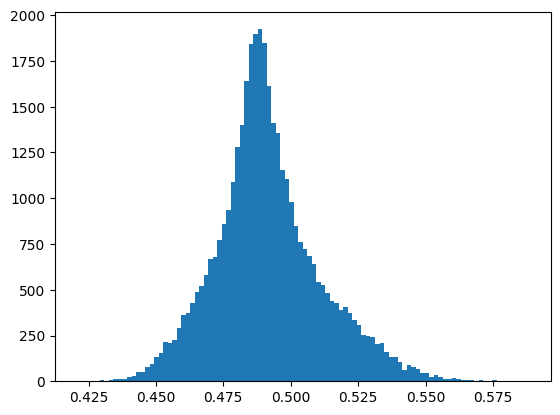

In [39]:
plt.hist(test['probability'], bins=100)
plt.show()

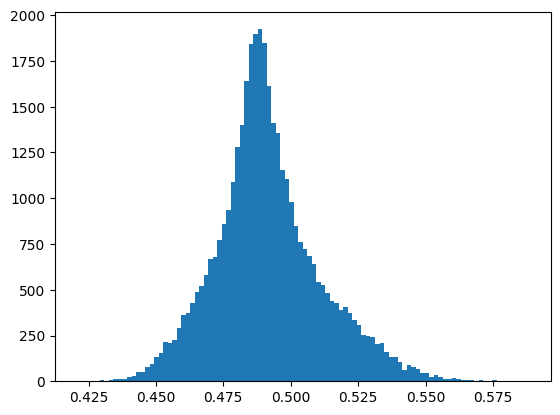

In [40]:
plt.hist(pred, bins=100)
plt.show()

In [41]:
threshold = 0.55

In [42]:
test['position'] = np.where(test.probability < (1-threshold), -1, np.nan)
test['position'] = np.where(test.probability > threshold, 1, test.position)

In [43]:
import pytz

for code, name in pytz.country_names.items():
    print(code, ':', name)

AD : Andorra
AE : United Arab Emirates
AF : Afghanistan
AG : Antigua & Barbuda
AI : Anguilla
AL : Albania
AM : Armenia
AO : Angola
AQ : Antarctica
AR : Argentina
AS : Samoa (American)
AT : Austria
AU : Australia
AW : Aruba
AX : Åland Islands
AZ : Azerbaijan
BA : Bosnia & Herzegovina
BB : Barbados
BD : Bangladesh
BE : Belgium
BF : Burkina Faso
BG : Bulgaria
BH : Bahrain
BI : Burundi
BJ : Benin
BL : St Barthelemy
BM : Bermuda
BN : Brunei
BO : Bolivia
BQ : Caribbean NL
BR : Brazil
BS : Bahamas
BT : Bhutan
BV : Bouvet Island
BW : Botswana
BY : Belarus
BZ : Belize
CA : Canada
CC : Cocos (Keeling) Islands
CD : Congo (Dem. Rep.)
CF : Central African Rep.
CG : Congo (Rep.)
CH : Switzerland
CI : Côte d'Ivoire
CK : Cook Islands
CL : Chile
CM : Cameroon
CN : China
CO : Colombia
CR : Costa Rica
CU : Cuba
CV : Cape Verde
CW : Curaçao
CX : Christmas Island
CY : Cyprus
CZ : Czech Republic
DE : Germany
DJ : Djibouti
DK : Denmark
DM : Dominica
DO : Dominican Republic
DZ : Algeria
EC : Ecuador
EE : Esto

In [46]:
#test.index = test.index.tz_localize('utc')
test['NYTime'] = test.index.tz_convert('America/New_York')
test['hour'] = test.NYTime.dt.hour

In [47]:
test['position'] = np.where(~test.hour.between(2,12), 0, test.position)

In [48]:
test.position.value_counts(dropna=False)

position
 0.0    21089
 NaN    17379
-1.0      346
 1.0      128
Name: count, dtype: int64

In [49]:
test['position'] = test.position.ffill()

In [50]:
test.position.value_counts(dropna=False)

position
 0.0    33840
-1.0     3773
 1.0     1329
Name: count, dtype: int64

In [51]:
test['strategy'] = test['position'] * test['returns']

In [52]:
test['creturns'] = test['returns'].cumsum().apply(np.exp)
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)

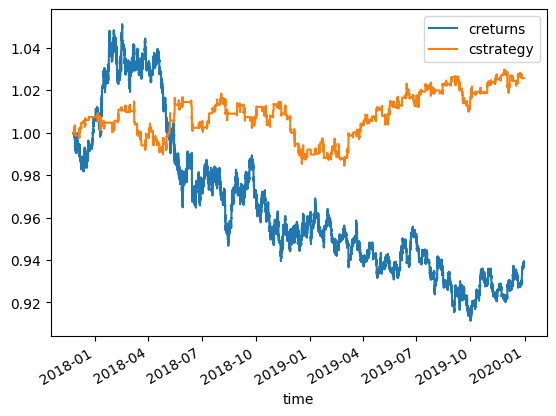

In [53]:
test[['creturns', 'cstrategy']].plot()
plt.show()

In [54]:
ptc = 0.000059

In [55]:
test['trades'] = test.position.diff().abs()
test.trades.value_counts()

trades
0.0    38420
1.0      508
2.0       13
Name: count, dtype: int64

In [56]:
test['strategy_net'] = test.strategy - test.trades * ptc

In [57]:
test['cstrategy_net'] = test['strategy_net'].cumsum().apply(np.exp)

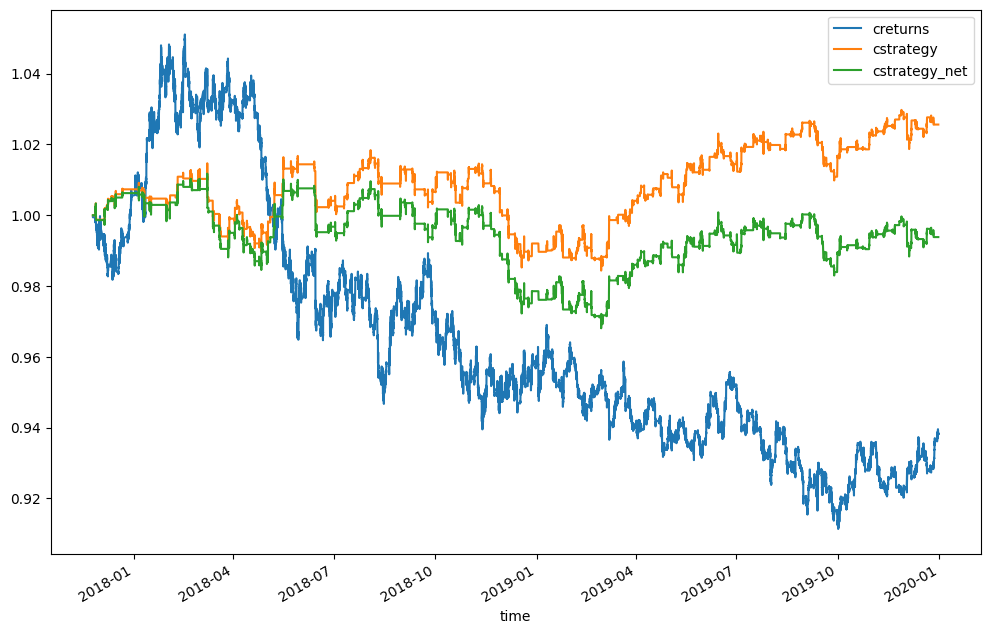

In [58]:
test[['creturns', 'cstrategy', 'cstrategy_net']].plot(figsize=(12, 8))
plt.show()